# Drawing all lines compatible with an edge point

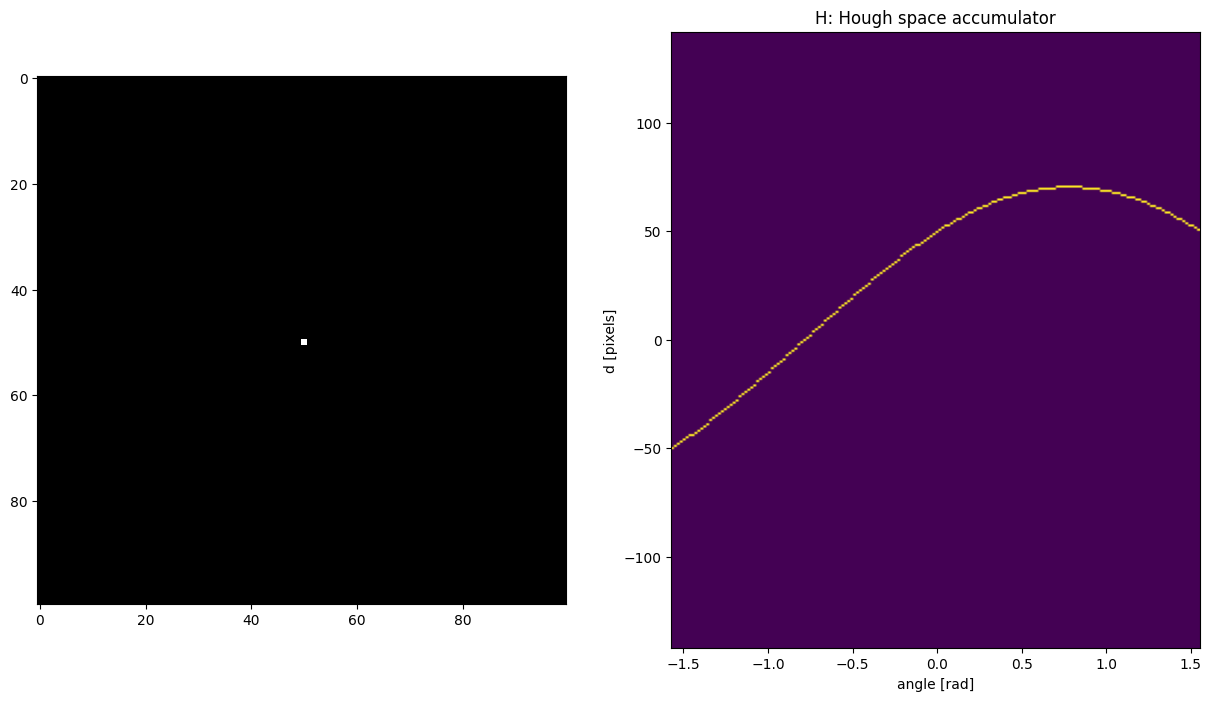

In [3]:
import skimage.feature
import skimage.transform.hough_transform as ht
import matplotlib.pyplot as plt
import numpy as np

im = np.zeros((100,100))
im[50,50] = 1
imedges = im
H, angles, distances = ht.hough_line(imedges)
fig,(ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,8))
ax0.imshow(imedges, cmap="gray")
Himage = ax1.imshow(H, extent=(angles[0], angles[-1], distances[0], distances[-1]), origin="lower", aspect="auto")
ax1.set(xlabel="angle [rad]",
        ylabel="d [pixels]",
        title="H: Hough space accumulator");

In [13]:
# This function draws a line (identified by d and theta) on axis ax
def drawline(d, theta, ax):
    # This is one point on the line (the closest one to the origin)
    p1 = np.array([d * np.cos(theta), d * np.sin(theta)])
    # This is the unit vector pointing in the direction of the line (remember what theta means in Hough space!)
    linedir = np.array([np.cos(theta + np.pi/2), np.sin(theta + np.pi/2)])
    # These are two points very far away in two opposite directions along the line
    p0 = p1 - linedir * 1000
    p2 = p1 + linedir * 1000
    # We now draw a line through p0 and p2, without rescaling the axes.
    ax.plot([p0[0], p2[0]], [p0[1], p2[1]], "g-", scalex=False, scaley=False, alpha=0.7)

In [ ]:
fig, ax = plt.subplots()

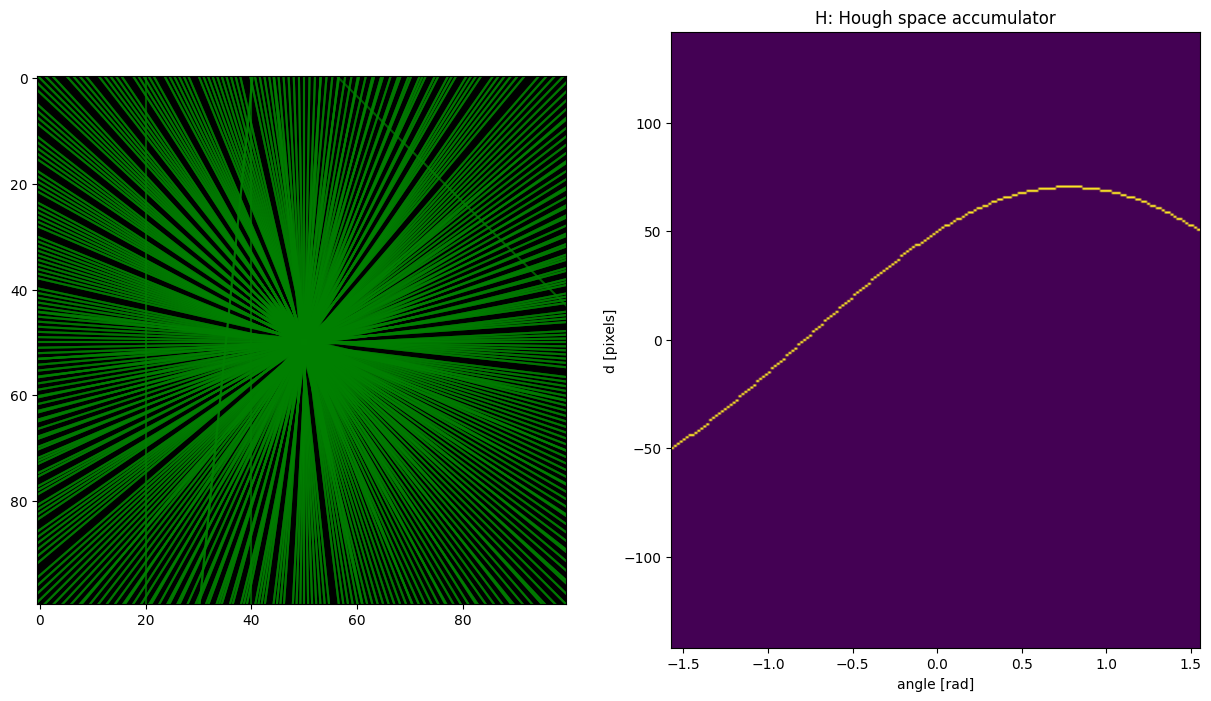

In [16]:
# take all points that got at least 1 vote on H, and draw the corresponding line on the left image
r, c = np.nonzero(H)
for d, theta in zip(distances[r], angles[c]):
    ...
    # drawline(d=d, theta=theta, ax=ax0)

drawline(d=40, theta=np.deg2rad(-45), ax=ax0)
fig